In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
import zipfile


In [2]:
link_dts = 'http://nrvis.com/download/data/dynamic/fb-wosn-friends.zip'
dts_zip = 'fb-wosn-friends.zip'
dts_name = 'fb-wosn-friends.edges'

In [3]:
r1 = requests.get(link_dts, allow_redirects=True)
open(dts_zip, 'wb').write(r1.content)

7481438

In [4]:
with zipfile.ZipFile(dts_zip, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
df = None
with open(dts_name, 'r') as fi:
    lines = fi.readlines() 
    print(lines[:6])
    lines = lines[2:]
    lines_ = [list(map(int, line.strip().split())) for line in lines ]
    # print(lines_[:4])
    df = pd.DataFrame(data=lines_, columns=['node_1', 'node_2', 'group', 'timestamp'])
print(df.dtypes)
df

['% sym unweighted\n', '% 1269502 63731 63731\n', '1 2 1 0\n', '1 2 1 1202446730\n', '1 3 1 0\n', '1 4 1 0\n']
node_1       int64
node_2       int64
group        int64
timestamp    int64
dtype: object


,node_1,node_2,group,timestamp
0,1,2,1,0
1,1,2,1,1202446730
2,1,3,1,0
3,1,4,1,0
4,1,4,1,1213591678
...,...,...,...,...
1269497,63635,63636,1,0
1269498,63638,63639,1,1227190874
1269499,63646,63647,1,1226638427
1269500,63682,63683,1,1229633785


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269502 entries, 0 to 1269501
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   node_1     1269502 non-null  int64
 1   node_2     1269502 non-null  int64
 2   group      1269502 non-null  int64
 3   timestamp  1269502 non-null  int64
dtypes: int64(4)
memory usage: 38.7 MB


In [7]:
df.describe()

,node_1,node_2,group,timestamp
count,1.269502e+06,1.269502e+06,1269502.0,1.269502e+06
mean,1.373282e+04,2.452442e+04,1.0,7.507266e+08
std,1.130070e+04,1.382842e+04,0.0,5.868974e+08
min,1.000000e+00,2.000000e+00,1.0,0.000000e+00
25%,4.743000e+03,1.342600e+04,1.0,0.000000e+00
50%,1.104100e+04,2.362600e+04,1.0,1.190734e+09
75%,2.024700e+04,3.440700e+04,1.0,1.219291e+09
max,6.369700e+04,6.373100e+04,1.0,1.232576e+09


We will drop `group` column and which row has value `timestamp = 0`. We can not create a temporal network without getting time stamp

In [8]:
df.drop(columns='group', inplace=True)

In [9]:
df = df[df.timestamp != 0]

In [10]:
df.describe()

,node_1,node_2,timestamp
count,788135.000000,788135.000000,7.881350e+05
mean,14852.727453,26157.100596,1.209246e+09
std,11659.727649,13860.316622,1.906903e+07
min,1.000000,2.000000,1.157455e+09
25%,5494.000000,15213.000000,1.196929e+09
50%,12017.000000,25490.000000,1.215498e+09
75%,21975.000000,35869.000000,1.224544e+09
max,63697.000000,63731.000000,1.232576e+09


# Creating dynamic graph
Divide timestamp to `k` bin means `k` graph. Afterthat, we have 1 dynamic graph with `k` snapshot (static graph)

In [11]:
k = 10

In [12]:
timestamp_range = (df.timestamp.max() - df.timestamp.min() + 1)//k 
timestamp_range

7512119

In [13]:
graphs_df = []
for i in range(k):
    upper_time = df.timestamp.min() + timestamp_range*(i+1)
    if i == k-1:
        graph_df = df.copy()
    else:
        graph_df = df[df.timestamp<upper_time].copy()
    graphs_df.append(graph_df)

In [22]:
graphs = []
for i in range(k):
    graphs.append(
        nx.from_pandas_edgelist(graphs_df[i], "node_1", "node_2", create_using=nx.Graph())
    )
    print(f"Graph {i+1}: \n{nx.info(graphs[i])}\n------")

Graph 1: 
Name: 
Type: Graph
Number of nodes: 7877
Number of edges: 20071
Average degree:   5.0961
------
Graph 2: 
Name: 
Type: Graph
Number of nodes: 11210
Number of edges: 42760
Average degree:   7.6289
------
Graph 3: 
Name: 
Type: Graph
Number of nodes: 14166
Number of edges: 69473
Average degree:   9.8084
------
Graph 4: 
Name: 
Type: Graph
Number of nodes: 17770
Number of edges: 105774
Average degree:  11.9048
------
Graph 5: 
Name: 
Type: Graph
Number of nodes: 22831
Number of edges: 147697
Average degree:  12.9383
------
Graph 6: 
Name: 
Type: Graph
Number of nodes: 27582
Number of edges: 182774
Average degree:  13.2531
------
Graph 7: 
Name: 
Type: Graph
Number of nodes: 33444
Number of edges: 247713
Average degree:  14.8136
------
Graph 8: 
Name: 
Type: Graph
Number of nodes: 40925
Number of edges: 343846
Average degree:  16.8037
------
Graph 9: 
Name: 
Type: Graph
Number of nodes: 50800
Number of edges: 475434
Average degree:  18.7179
------
Graph 10: 
Name: 
Type: Graph
Nu

Name: 
Type: Graph
Number of nodes: 7877
Number of edges: 20071
Average degree:   5.0961


{1: Text(0.09367523537420411, -0.9790300071228634, '1'),
 9: Text(0.01560731327331469, -0.8413416963827907, '9'),
 14: Text(-0.009507916728714885, 0.689756984358699, '14'),
 165: Text(-0.1289591262863865, -0.8156538351007916, '165'),
 1127: Text(-0.013160232606843422, -1.0, '1127'),
 2175: Text(-0.1065847302915975, -0.9360341540668097, '2175'),
 2280: Text(-0.10826855102417837, 0.5677119371577104, '2280'),
 2398: Text(-0.09047702354762802, -0.7515411374455301, '2398'),
 3703: Text(0.13700720486164603, 0.7592323824428038, '3703'),
 4388: Text(0.1501216189159063, -0.7763694560258093, '4388'),
 5055: Text(0.15069979450031187, 0.6609227413019153, '5055'),
 5569: Text(0.04718545012670163, -0.7119482064229893, '5569'),
 9231: Text(-0.024574264945453946, 0.8591357467902859, '9231'),
 10814: Text(-0.002630128953081003, 0.5434157537114038, '10814'),
 10884: Text(-0.12057767572256424, 0.806527744283284, '10884'),
 11324: Text(-0.16628863300386434, 0.6635026489950884, '11324'),
 11800: Text(0.071

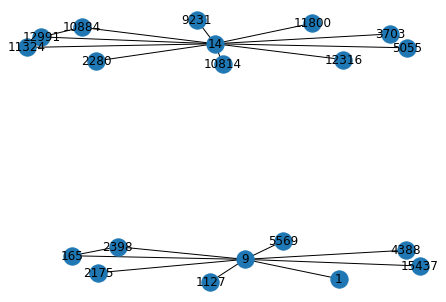

In [34]:
G = graphs[0].copy()

print(nx.info(G))
G.remove_nodes_from(list(G.nodes())[20:])

nx.draw(G, pos=nx.spring_layout(G, seed=6))
nx.draw_networkx_labels(G, pos=nx.spring_layout(G, seed=6))

# Save dynamic graph

In [36]:
for i in range(k):
    nx.write_edgelist(G,f'graph{i}.edgelist',data=False)